In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
#2
df_mental_illness = df.pivot_table(index='race', columns='signs_of_mental_illness', values='id', aggfunc='count').fillna(0)
df_mental_illness

signs_of_mental_illness,False,True
race,,
A,69,24
B,1109,183
H,741,157
N,62,14
O,36,11
W,1754,709


In [4]:
#3
race_mental_illness_percentage = (df_mental_illness[True] / df_mental_illness.sum(axis=1) * 100)

df_mental_illness['mental_illness_percentage'] = np.around(race_mental_illness_percentage,2)

most_mental_illness_race = race_mental_illness_percentage.idxmax()
print(f"Największy odsetek oznak choroby psychicznej jest w grupie rasy: {most_mental_illness_race}")

Największy odsetek oznak choroby psychicznej jest w grupie rasy: W


In [5]:
df_mental_illness

signs_of_mental_illness,False,True,mental_illness_percentage
race,,,
A,69,24,25.81
B,1109,183,14.16
H,741,157,17.48
N,62,14,18.42
O,36,11,23.40
W,1754,709,28.79


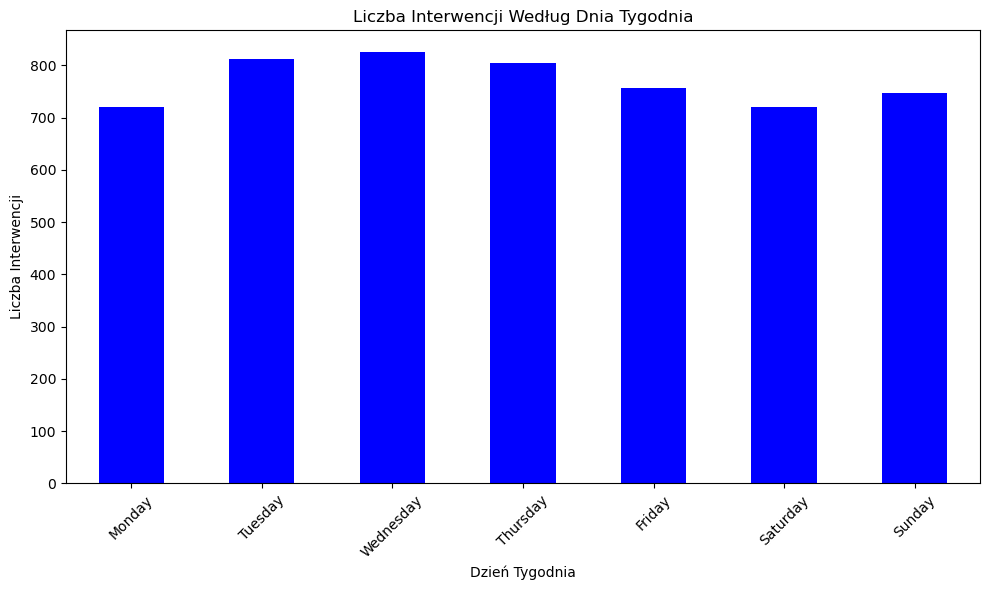

In [6]:
#4
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

interventions_by_day = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0
)

plt.figure(figsize=(10, 6))
interventions_by_day.plot(kind='bar', color='blue')
plt.xlabel('Dzień Tygodnia')
plt.ylabel('Liczba Interwencji')
plt.title('Liczba Interwencji Według Dnia Tygodnia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#5
data_1 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data_2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

population_data_1 = data_1[0][['State','Census population, April 1, 2020 [1][2]']]
population_data_1.columns = ['state_name', 'census_population']
population_data_2 = data_2[0].iloc[:, [0, 5]]
population_data_2.columns = ['state_name', 'state_code']
incident_data = df.pivot_table(index='state', values='id', aggfunc='count')

merged_population_data = pd.merge(population_data_1, population_data_2, on='state_name', how='inner')
merged_data = pd.merge (merged_population_data, incident_data, left_on='state_code', right_index=True)
merged_data = merged_data.rename(columns={'id': 'shoot_count'})
merged_data['shoots_per_1000'] = np.around((merged_data['shoot_count'] / merged_data['census_population']) * 1000,2)
merged_data

,state_name,census_population,state_code,shoot_count,shoots_per_1000
0,California,39538223,CA,797,0.02
1,Texas,29145505,TX,480,0.02
2,Florida,21538187,FL,348,0.02
3,New York,20201249,NY,101,0.00
4,Pennsylvania,13002700,PA,107,0.01
5,Illinois,12812508,IL,102,0.01
6,Ohio,11799448,OH,155,0.01
7,Georgia,10711908,GA,180,0.02
8,North Carolina,10439388,NC,156,0.01
9,Michigan,10077331,MI,78,0.01
